<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Fitting-normal-distribution-to-a-multinormal-distribution" data-toc-modified-id="Fitting-normal-distribution-to-a-multinormal-distribution-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Fitting normal distribution to a multinormal distribution</a></span></li><li><span><a href="#Histogram" data-toc-modified-id="Histogram-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Histogram</a></span><ul class="toc-item"><li><span><a href="#Fitting-multinormal-distribution-to-histogram-with-fixed-bin-width" data-toc-modified-id="Fitting-multinormal-distribution-to-histogram-with-fixed-bin-width-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Fitting multinormal distribution to histogram with fixed bin-width</a></span></li><li><span><a href="#Optimal-binwidth" data-toc-modified-id="Optimal-binwidth-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Optimal binwidth</a></span><ul class="toc-item"><li><span><a href="#By-fitting" data-toc-modified-id="By-fitting-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>By fitting</a></span></li><li><span><a href="#Improved-idea" data-toc-modified-id="Improved-idea-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Improved idea</a></span></li></ul></li><li><span><a href="#Getting-optimal-bin-width" data-toc-modified-id="Getting-optimal-bin-width-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Getting optimal bin-width</a></span><ul class="toc-item"><li><span><a href="#At-the-level-of-histogram" data-toc-modified-id="At-the-level-of-histogram-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>At the level of histogram</a></span></li><li><span><a href="#At-the-level-of-fitting" data-toc-modified-id="At-the-level-of-fitting-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>At the level of fitting</a></span></li></ul></li></ul></li><li><span><a href="#KDE" data-toc-modified-id="KDE-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>KDE</a></span><ul class="toc-item"><li><span><a href="#Fitting-multinormal-distribution-to-KDE-with-fixed-band-width" data-toc-modified-id="Fitting-multinormal-distribution-to-KDE-with-fixed-band-width-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Fitting multinormal distribution to KDE with fixed band-width</a></span></li><li><span><a href="#Using-cross-validation-to-get-optimal-bandwidth" data-toc-modified-id="Using-cross-validation-to-get-optimal-bandwidth-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Using cross-validation to get optimal bandwidth</a></span><ul class="toc-item"><li><span><a href="#At-the-level-of-probability-density" data-toc-modified-id="At-the-level-of-probability-density-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>At the level of probability density</a></span></li><li><span><a href="#At-the-level-of-fitting" data-toc-modified-id="At-the-level-of-fitting-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>At the level of fitting</a></span></li></ul></li></ul></li></ul></div>

# Outline

1. Fitting to multinormal model distribution
   1. Histogram fixed bin width
   1. Histogram optimized bin width (cross-validation)
   1. KDE fixed bandwidth
   1. KDE optimized bandwidth
   1. GMM 
2. Bayesian inference
   1. Lorentzian function
   1. Some SANS function
   1. Diffraction function
3. Real data
   1. Histogram fixed bin width
   1. Histogram optimized bin width (cross-validation)
   1. KDE fixed bandwidth
   1. KDE optimized bandwidth
   1. GMM 
4. ESS instruments
   1. LoKI
   1. DREAM
   1. C-SPEC

In [1]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import scipy
from scipy.stats import distributions
from sklearn.neighbors import KernelDensity
import lmfit
from multiprocessing import Pool

# Fitting to multinormal distribution

In [2]:
class MultiModal(object):
    
    def __init__(self, distributions, locs, scales, weights):
        self.distributions = distributions
        self.locs = locs
        self.scale = scales
        weights = np.asarray(weights)
        self.weights= weights/np.sum(weights)
        self.inst_distributions = [
            distribution(loc=loc, scale=scale) for loc, scale in zip(locs, scales)
        ]
        
    def pdf(self, x, locs=None, scales=None, weights=None):
        if locs is scales is weights is None:
           pass 
        

## Fitting normal distribution to a multinormal distribution

In [3]:
def gaussian(x, loc, scale):
    return distributions.norm.pdf(x, loc=loc, scale=scale)

norm_model = lmfit.Model(gaussian)
params = norm_model.make_params()

In [4]:
xgrid = np.linspace(-5,5, 100)

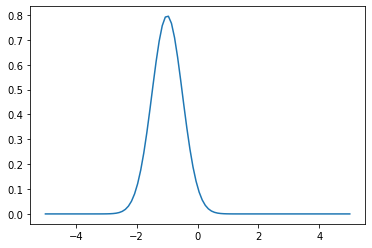

In [5]:
target_dist = distributions.norm(loc=-1, scale=0.5)
y = target_dist.pdf(xgrid)
plt.plot(xgrid, y)

In [6]:
result = norm_model.fit(y, x=xgrid, loc=0, scale=1)

In [7]:
result.values

{'loc': -1.0, 'scale': 0.5}

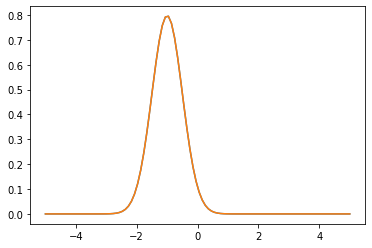

In [8]:
plt.plot(xgrid, y, xgrid, result.best_fit)

## Histogram

In [9]:
sample = target_dist.rvs(10**7)

### Fitting multinormal distribution to histogram with fixed bin-width

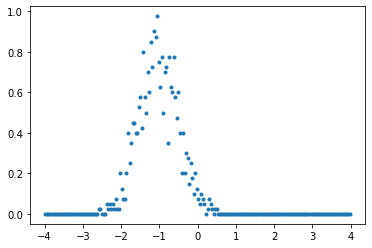

In [10]:
nbins = 200
frequencies, bin_edges = np.histogram(sample[:1000], bins=nbins, range=[-4,4], density=True)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
plt.plot(bin_centers, frequencies, '.')

In [11]:
result = norm_model.fit(frequencies,x=bin_centers, loc=0, scale=1)
result.best_values

{'loc': -1.0448739094196071, 'scale': 0.5153759475990186}

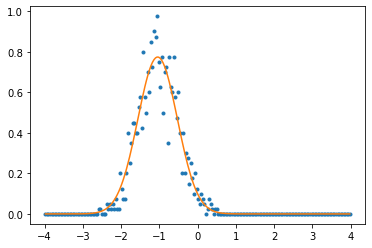

In [12]:
plt.plot(bin_centers, frequencies, '.', bin_centers, result.best_fit)

In [13]:
# confidence intervals
result.conf_interval()
result.ci_out

OrderedDict([('loc',
              [(0.9973002039367398, -1.0787639819191488),
               (0.9544997361036416, -1.0673105064871953),
               (0.6826894921370859, -1.056058929176025),
               (0.0, -1.0448739094196071),
               (0.6826894921370859, -1.0336762196001055),
               (0.9544997361036416, -1.0223890869246621),
               (0.9973002039367398, -1.0108767376077397)]),
             ('scale',
              [(0.9973002039367398, 0.48915369308073015),
               (0.9544997361036416, 0.4977790523146482),
               (0.6826894921370859, 0.5065009138706924),
               (0.0, 0.5153759475990186),
               (0.6826894921370859, 0.5244947042643935),
               (0.9544997361036416, 0.5339281633215424),
               (0.9973002039367398, 0.5437890620200129)])])

### Optimal binwidth

#### By fitting 
Finding the binwidths that gives the best fit

In [14]:
class FitResults(dict):
    """
    Customized dictionary where key, value specify name of fitted parameter and a tuple (min, best, max),
    where min and max are the minimum and maximum limits for the 95% confidence interval and best is the 
    value for the fitted parameter
    
    The class is instantiated with a title, which both defines the return value for __str__ and is used for 
    plotting
    """
    
    def __init__(self, title=None):
        self.title = title
        
    def __str__(self):
        """
        Returns self.title if defined else the return value for dict.__str__
        """
        if self.title is None:
            return super().__str__()
        else:
            return self.title
    
    def plot(self, logscalex=True, ncols=3):
        """
        Plots the fitted parameters and associated 95% confidence interval as a function of sample size. 
        nbins as number of sample size is also plotted
        
        """
        # Calculate the number of rows needed to plot all parameters and nbins
        nrows = ( len(self) + 1) // ncols + int( (len(self) + 1) % ncols != 0)
        fig = plt.figure(figsize=(15,4*nrows))
        if self.title is not None:
            fig.suptitle(self.title, fontsize=16)
        axes = {}
        for i, key in enumerate(self.keys()):
            axes[key] = fig.add_subplot(nrows, ncols, i+1)
            axes[key].fill_between(sizes, self[key].min, self[key].max)
            axes[key].plot(sizes, self[key].best, color='red')
            axes[key].set_title(key, fontsize=14)
            if logscalex is True:
                axes[key].set_xscale('log')
        nbins = fig.add_subplot(nrows, ncols, i+2)
        if logscalex is True:
            nbins.set_xscale('log')
        
        nbins.plot(sizes, self.nbins)
    

class FitResult(object):
    """
    Container for fitting results for a specific paramter over a range of sample sizes
    
    """
    
    def __init__(self):
        self.min = []  # lower bound for 95% confidence interval
        self.best = []  # best value for fitted parameter
        self.max = []  # upper bound for 95% confidence interval


class BestFit(object):
    """
    Class that given a sample and a model can provide the best fit of the model for a given selection
    of sample. The selection is given by sample[:size] to mimic the first events acquired at a beam line
    
    """
    
    
    def __init__(self, sample, model):
        self.sample = sample  # numpy array
        self.model = model  # instance of lmfit Model

    def get_parameters(self, sample_size, nbins=200):
        """
        Returns best fit of self.model to a histogram of sample[:sample_size] with nbins 
        number of bins . The result is returned as a dictionary where each key is parameter 
        and values are (min, best, max, nbins) where min and max are minimum and maximum 
        bounds for 95% confidence interval and best is the value of the parameter for best fit.
        
        """
        frequencies, bin_edges = np.histogram(self.sample[:sample_size], 
                                              bins=nbins, 
                                              range=[-4,4], 
                                              density=True)
        bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])
        result = self.model.fit(frequencies,x=bin_centers, loc=0, scale=1)
        result.conf_interval()
        self.params = {}
        for key in result.ci_out.keys():
            self.params[key] = (result.ci_out[key][1][1],      # 95% conf lower
                                result.ci_out[key][3][1],   # best value
                                result.ci_out[key][-2][1],  # 95% conf upper
                                nbins)  # nbins
        return self.params
    
   
    def objective_function(self, nbins, sample_size, objective='wmean'):
        """
        Objective function to be used for optimization. The objective can be either a weighted average 
        of the 95% confidence intervals or the confidence interval for a specific parameter
        
        """
        nbins_int = int(round(nbins))
        params = self.get_parameters(sample_size, nbins_int)
        if objective == 'wmean':
            mean95conf =  sum([(value[2] - value[0])/value[1] for value in params.values()])
            return mean95conf
        else:
            param_obj = params[objective]
            return param_obj[2] - param_obj[0]  
        
        #print("P", nbins_int, mean95conf, params)
        
    def get_parameters_for_best_nbins(self, sample_size, objective='wmean', method='bounded',
                                     nbins_range = [2**i for i in range(3,15)]):
        """
        Calculates the optimimal numbers of nbins for getting the best fit measured on the 95% confidence
        interval for a specific parameter indicated with objective or for a weighted average over all 
        parameters' 95% confidence interval (objective='wmean'). The method used is given by the input
        parameter method, which can be either a method available in scipy.optimize.minimize_scalar or
        'brute' in which case the optimal value is found by calculating the objective function over a range 
        of nbins. 
        """
        # TODO: Optimize on bin width (contiuous variable) rather than nbins (discrete variable)
        if method in ['bounded']:
            self.optimization_result = scipy.optimize.minimize_scalar(
                self.objective_function, 
                args=(sample_size, objective),
                method=method,
                bracket = [10, min(10000, 10*sample_size)], 
                bounds=[2, min(10000, 10*sample_size)],
                options={'disp' : 1, 'xatol' : 0.1}
            )
            self.optimization_result['nbins'] = round(self.optimization_result['x'])
        elif method == 'brute':
            nbins_list = nbins_range
                        
            objective_min = self.objective_function(nbins_list[0], sample_size, objective)
            best_params = self.params
            print("BRUTE:", sample_size, nbins_list[0], objective_min)
            for nbins in nbins_list[1:]:
                objective_result = self.objective_function(nbins, sample_size, objective)
                print("    BRUTE:", nbins, objective_result)
                if objective_result < objective_min:
                    objective_min = objective_result
                    best_params = self.params
                    print("BEST", self.params['loc'][-1], objective_result)
            self.params = best_params
        else:
            raise Exception("No suitable optimization method chosen")
        return self.params


    def get_best_params(self, sizes, nbins=200, objective='wmean', method='bounded', processes=4):
        """
        Iterate over sizes and calculates best parameters for a fit to a nbins histogram. If nbins 
        is =-1 if will find the optimal nbins for each size judged on the 'objective' and using method
        for optimization
        
        """
        if nbins == -1:
            paramss= [self.get_parameters_for_best_nbins(size, objective, method) for size in sizes]
            results = FitResults(title='{}, {}'.format(objective, method))
        else:
            paramss = [self.get_parameters(size, nbins=nbins) for size in sizes]
            results = FitResults(title='{}'.format(nbins))
        for key in paramss[0].keys():
            results[key] = FitResult()
            results[key].min, results[key].best, results[key].max, results.nbins = ( 
                [param[key][i] for param in paramss] for i in [0,1,2, 3 ]
            )
        return results


    

In [15]:
sizes = [10*(2**i) for i in range(2, 6) ]
gaussian_fit = BestFit(sample, norm_model)

In [16]:
import itertools
args = list(itertools.product([sizes], [-1], ['loc', 'scale'], ['brute', 'bounded']))

args += list(itertools.product([sizes], [ 16, 32, 200]))


args

[([40, 80, 160, 320], -1, 'loc', 'brute'),
 ([40, 80, 160, 320], -1, 'loc', 'bounded'),
 ([40, 80, 160, 320], -1, 'scale', 'brute'),
 ([40, 80, 160, 320], -1, 'scale', 'bounded'),
 ([40, 80, 160, 320], 16),
 ([40, 80, 160, 320], 32),
 ([40, 80, 160, 320], 200)]

In [17]:
results_loc_brute = gaussian_fit.get_best_params(sizes, -1, 'loc', 'brute')  # optimizing on location

/Users/thomasholmrod/opt/anaconda3/envs/ML/lib/python3.9/site-packages/lmfit/confidence.py:327: UserWarning: rel_change=-0.0013188754522532567 < 1e-05 at iteration 6 and prob(scale=0.44714563473494107) = 0.9752141280897955 < max(sigmas).
  warn(errmsg)


BRUTE: 40 8 0.08683889433047187
    BRUTE: 16 0.07979450359418472
BEST 16 0.07979450359418472
    BRUTE: 32 0.1631338735022546
    BRUTE: 64 0.23485363388673142
    BRUTE: 128 0.2488826736442884
    BRUTE: 256 0.22487825206596168
    BRUTE: 512 0.24922406735996383
    BRUTE: 1024 0.2560289844096011
    BRUTE: 2048 0.25928628894329686
    BRUTE: 4096 0.264670348525436
    BRUTE: 8192 0.2672349762161562
    BRUTE: 16384 0.2686288471149527


/Users/thomasholmrod/opt/anaconda3/envs/ML/lib/python3.9/site-packages/lmfit/confidence.py:327: UserWarning: rel_change=-1.0 < 1e-05 at iteration 2 and prob(loc=-1.1104307123060282) = 0.0 < max(sigmas).
  warn(errmsg)
/Users/thomasholmrod/opt/anaconda3/envs/ML/lib/python3.9/site-packages/lmfit/confidence.py:327: UserWarning: rel_change=-0.09333487736309076 < 1e-05 at iteration 2 and prob(scale=0.4875884937433058) = 0.3660796906145747 < max(sigmas).
  warn(errmsg)


BRUTE: 80 8 inf
    BRUTE: 16 0.09581561779782621
BEST 16 0.09581561779782621
    BRUTE: 32 0.06266131233881711
BEST 32 0.06266131233881711


ValueError: The model function generated NaN values and the fit aborted! Please check your model function and/or set boundaries on parameters where applicable. In cases like this, using "nan_policy='omit'" will probably not work.

In [18]:
results_scale_brute = gaussian_fit.get_best_params(sizes, -1, 'scale', 'brute')  # optimizing on location


BRUTE: 40 8 0.14870350239754238
    BRUTE: 16 0.06648054246160107
BEST 16 0.06648054246160107
    BRUTE: 32 0.1303366612742638
    BRUTE: 64 0.1901509320682046
    BRUTE: 128 0.20529785968621134
    BRUTE: 256 0.18498280131406042
    BRUTE: 512 0.20505822781460015
    BRUTE: 1024 0.21112899650889932
    BRUTE: 2048 0.21391719367705714
    BRUTE: 4096 0.21823221985948082
    BRUTE: 8192 0.22042492231163657
    BRUTE: 16384 0.22152359933044496
BRUTE: 80 8 inf
    BRUTE: 16 0.08171814820506851
BEST 16 0.08171814820506851
    BRUTE: 32 0.05388086092904221
BEST 32 0.05388086092904221


ValueError: The model function generated NaN values and the fit aborted! Please check your model function and/or set boundaries on parameters where applicable. In cases like this, using "nan_policy='omit'" will probably not work.

In [19]:
results_wmean_brute = gaussian_fit.get_best_params(sizes, -1, 'wmean', 'brute')  # optimizing on location

BRUTE: 40 8 0.16602981469670158
    BRUTE: 16 0.04323264497700978
BEST 16 0.04323264497700978
    BRUTE: 32 0.06546673141797488
    BRUTE: 64 0.10395388614059903
    BRUTE: 128 0.11573056026160314
    BRUTE: 256 0.10308014353552902
    BRUTE: 512 0.11320316950497822
    BRUTE: 1024 0.1176212622648104
    BRUTE: 2048 0.1197581062016859
    BRUTE: 4096 0.12197200867164154
    BRUTE: 8192 0.12332399602076849
    BRUTE: 16384 0.12377701446177009
BRUTE: 80 8 nan
    BRUTE: 16 0.07395441273852062
    BRUTE: 32 0.05394373330865972


ValueError: The model function generated NaN values and the fit aborted! Please check your model function and/or set boundaries on parameters where applicable. In cases like this, using "nan_policy='omit'" will probably not work.

In [20]:
results_loc_opt = gaussian_fit.get_best_params(sizes, -1, 'loc')  # optimizing on location


ValueError: The model function generated NaN values and the fit aborted! Please check your model function and/or set boundaries on parameters where applicable. In cases like this, using "nan_policy='omit'" will probably not work.

In [21]:
results_scale_opt = gaussian_fit.get_best_params(sizes, -1, 'scale')  # optimizing on location


ValueError: The model function generated NaN values and the fit aborted! Please check your model function and/or set boundaries on parameters where applicable. In cases like this, using "nan_policy='omit'" will probably not work.

In [22]:
results_wmean_opt = gaussian_fit.get_best_params(sizes, -1, 'wmean')  # optimizing on location

ValueError: The model function generated NaN values and the fit aborted! Please check your model function and/or set boundaries on parameters where applicable. In cases like this, using "nan_policy='omit'" will probably not work.

In [23]:
results_200 = gaussian_fit.get_best_params(sizes, 200)

ValueError: The model function generated NaN values and the fit aborted! Please check your model function and/or set boundaries on parameters where applicable. In cases like this, using "nan_policy='omit'" will probably not work.

In [24]:
results_32 = gaussian_fit.get_best_params(sizes, 32)

In [25]:
FitResults.plot(results_loc_brute, title="loc, brute")
FitResults.plot(results_scale_brute, title="scale, brute")
FitResults.plot(results_wmean_brute, title="wmean, brute")
FitResults.plot(results_200, title="nbins=200")
FitResults.plot(results_32, title="nbins=32")
FitResults.plot(results_loc_opt, title="loc, opt")
FitResults.plot(results_scale_opt, title="scale, opt")
FitResults.plot(results_wmean_opt, title="wmean, opt")


NameError: name 'results_loc_brute' is not defined

In [ ]:
results_opt.nbins

In [ ]:
results = [results_32, results_200, 
           results_loc_brute, results_wmean_brute, results_scale_brute, 
           results_loc_opt, results_wmean_opt, results_scale_opt]
for result in results:
    plt.plot(sizes, result['loc'].best)
plt.xscale('log')

In [ ]:
for result in results:
    conf95 = np.array(result['loc'].max) - np.array(result['loc'].min)
    plt.plot(sizes, conf95)
    
plt.xscale('log')
plt.yscale('log')

#### Improved idea
Go from the center of interval and optimize bin-width which is a floating point

### Getting optimal bin-width

Divide data set in a train and test set. Create histogram on first part and evaluate on second half. Wouldn't work, one bin would always give identical results for the two halves

* [Tine Buch-Kromann](http://www.buch-kromann.dk/tine/nonpar/Histogram.pdf)
* [Duke stat course](http://www2.stat.duke.edu/~wjang/teaching/S05-293/lecture/ch6.pdf)

In [ ]:
def mean_sqr_error(x, sample, histogram, model):
    mse =  model.pdf(x)/(len(sample) * histogram.bin_width)
    mse += model.dpdf(x)**2*(histogram.get_bincenter(x) - x)**2
    return mse

def optimal_bin(ndata, model_derivative, xrange = [-np.inf, np.inf]):
    model_derivative_squared = lambda x: model_derivative(x)**2
    model_2_2 =  scipy.integrate(model_derivative_squared, xrange)
    return (6./(model_2_2 * ndata))**(1./3)

In [ ]:
ca

#### At the level of histogram
#### At the level of fitting
## KDE
### Fitting multinormal distribution to KDE with fixed band-width
### Using cross-validation to get optimal bandwidth
#### At the level of probability density
#### At the level of fitting
# GMM